# Which companies are hiring the most Data Analysts, and what is the average salary offered by these companies?

In [5]:
# Importing the needed libraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()

# From the info viewed, the job_posted_date column is showed as an object(str)
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()

df_USA_cleaned = df_USA.dropna(subset=['salary_year_avg']).reset_index().drop('index', axis =1)

# View the head of the data
print('Shape of the data:',(df_USA_cleaned.shape))
df_USA_cleaned.head()

Shape of the data: (4350, 19)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
0,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October,Thursday
1,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"['excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint']}",February,Monday
2,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '...",January,Tuesday
3,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr...",November,Tuesday
4,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog...",October,Tuesday


In [3]:
df_com_hiring = df_USA_cleaned[['company_name', 'job_location','salary_year_avg']]

df_com_hiring_n = df_com_hiring.groupby(['company_name']).agg(
    count = ('company_name', 'size'),
    salary_year_avg = ('salary_year_avg','median')).sort_values(by = 'count',ascending=False).head(20)

print('Top 20 most hiring companies for Data Analyst in the United States')
print("_"*70)
df_com_hiring_n

Top 20 most hiring companies for Data Analyst in the United States
______________________________________________________________________


,count,salary_year_avg
company_name,,
Get It Recruit - Information Technology,138,84000.0
Robert Half,106,87500.0
Citi,88,125540.0
Insight Global,87,95000.0
Jobot,60,91250.0
"Acadia Technologies, Inc.",53,70000.0
TikTok,46,149508.5
Booz Allen Hamilton,35,115000.0
CyberCoders,31,95000.0


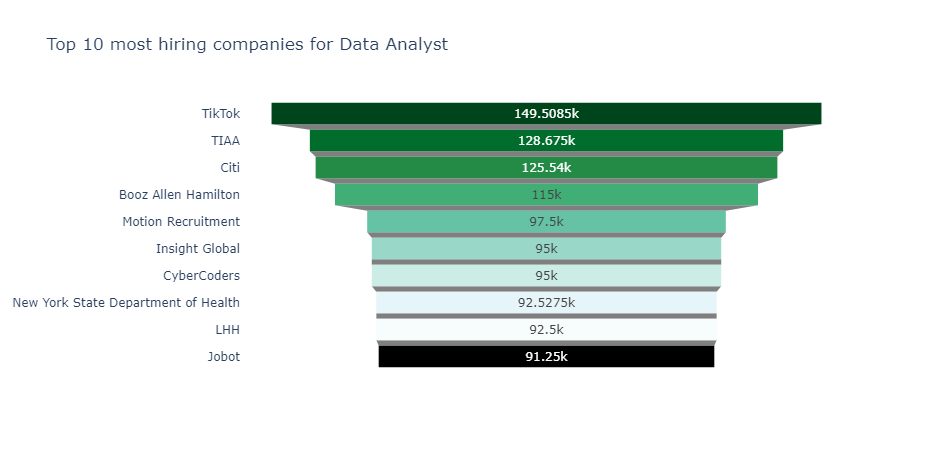

In [6]:
df_com_hiring_plot = df_com_hiring_n.sort_values(by = 'salary_year_avg', ascending= False).head(10)

fig = go.Figure(go.Funnel(x = df_com_hiring_plot['salary_year_avg'], y = df_com_hiring_plot.index, 
          marker = {'color':px.colors.sequential.BuGn_r}))

fig.update_layout(template = 'plotly_white', title = "Top 10 most hiring companies for Data Analyst")
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Top_10_hiring_companies.png')